In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Visualize the dataset

Target labels:  [0 9 7 3 9 7 2 8 1 0]


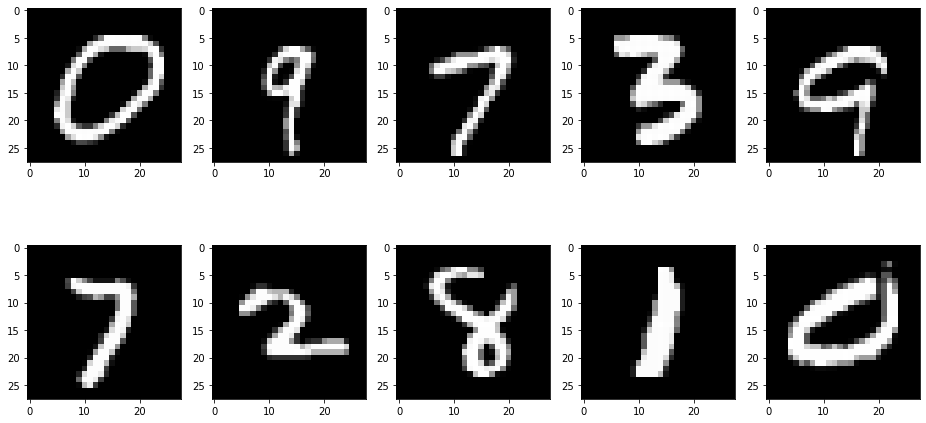

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [14]:
"""
The Sequential model allows us to create models layer-by-layer as we need in 
a multi-layer perceptron and is limited to single-input, single-output stacks of layers.
"""
from tensorflow.keras import regularizers

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(32,input_dim=64,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(10,input_dim=32,activation='softmax', kernel_regularizer=regularizers.l1(0.001)))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [16]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1657 - accuracy: 0.8834
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7641 - accuracy: 0.9252
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6569 - accuracy: 0.9345
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6026 - accuracy: 0.9384
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5719 - accuracy: 0.9404
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5510 - accuracy: 0.9420
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5361 - accuracy: 0.9414
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5218 - accuracy: 0.9434
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5137 - accuracy: 0.9443
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.506

Plot the loss and accuracy graphs

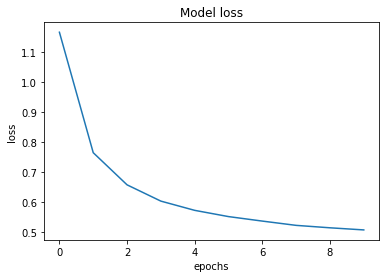

In [17]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

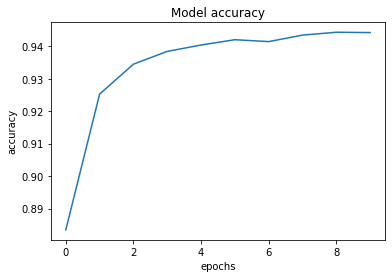

In [18]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [19]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.4911 - accuracy: 0.9462
Loss of the Test dataset is: 0.4911258816719055
Accuracy of the test dataset is: 0.9462000131607056


Save the model weights

In [20]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

In [21]:
y_pred = model.predict(new_test_data)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(new_test_target, axis=1)

313/313 [==============================] - 0s 1ms/step


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 956    0    1    2    1    7    3    4    3    3]
 [   0 1106    0    4    1    0    4    1   18    1]
 [   3    3  964   18   13    1    6   14    7    3]
 [   1    1   15  934    1   21    3    8   18    8]
 [   1    1    2    0  927    0    6    2    3   40]
 [   3    1    1   17    1  844   16    2    3    4]
 [   8    3    0    2    8   13  919    0    5    0]
 [   1    5   17   10    3    2    0  963    1   26]
 [   5    1    4   15    9   13    9    6  886   26]
 [   4    4    0   10   11    8    0    5    4  963]]


# All answers are provided